# Ex2

Santiago Benites 54392

João Ferreira 55312

# Imports

In [23]:
import os
import datetime

import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
import random

# Autoregression model

In [24]:
# Define the parameters
total_points = 5000
points_per_period = 50
alphas = [0.6, -0.54, -0.44]
U = np.random.normal(0, 0.01, total_points)

# Time values
t =  np.arange(0,5000)


# Generate the time series data
X = np.zeros(total_points)
X[:3] = [5, 6, 3]
for i in range(3, total_points):
    X[i] = alphas[0]*X[i-1] + alphas[1]*X[i-2] + alphas[2]*X[i-3] + U[i]

# Split the data into training and validation sets
split_fraction = 0.8
train_split = int(split_fraction * total_points)

y_train = X[:train_split]
y_train = y_train.reshape(-1, points_per_period, 1)
x_train = t[:train_split].reshape(y_train.shape)

y_val = X[train_split:]
y_val = y_val.reshape(-1, points_per_period, 1)
x_val = t[train_split:].reshape(y_val.shape)


# Split data into test set
start = int(total_points*0.5) #random.uniform(0, 1)
end = int(total_points*0.6)#random.uniform(start, 1)
y_test = X[start:end]
y_test = y_test.reshape(-1, points_per_period, 1)
x_test = t[start:end].reshape(y_test.shape)

# Print the first 10 data points
print(x_train.shape)
print(y_train.shape)
print(x_val.shape)
print(y_val.shape)


(80, 50, 1)
(80, 50, 1)
(20, 50, 1)
(20, 50, 1)


# Model

In [39]:
# Define the model
model1 = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(64, input_shape=(points_per_period, 1), return_sequences=True),
    tf.keras.layers.LSTM(32, return_sequences=True),
    tf.keras.layers.Dense(32, activation="relu", input_dim=2),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(1)
])

# Compile the model
model1.compile(optimizer='adam', loss='mse')

# Train the model
history = model1.fit(
    x=x_train,
    y=y_train,
    validation_data=(x_val, y_val),
    epochs=1000
)

Epoch 1/1000
3/3 [==============================] - 4s 331ms/step - loss: 3.8056 - val_loss: 0.0326
Epoch 2/1000
3/3 [==============================] - 0s 40ms/step - loss: 3.8046 - val_loss: 0.0326
Epoch 3/1000
3/3 [==============================] - 0s 40ms/step - loss: 3.8044 - val_loss: 0.0325
Epoch 4/1000
3/3 [==============================] - 0s 39ms/step - loss: 3.8043 - val_loss: 0.0325
Epoch 5/1000
3/3 [==============================] - 0s 39ms/step - loss: 3.8042 - val_loss: 0.0325
Epoch 6/1000
3/3 [==============================] - 0s 46ms/step - loss: 3.8041 - val_loss: 0.0325
Epoch 7/1000
3/3 [==============================] - 0s 44ms/step - loss: 3.8039 - val_loss: 0.0325
Epoch 8/1000
3/3 [==============================] - 0s 40ms/step - loss: 3.8039 - val_loss: 0.0325
Epoch 9/1000
3/3 [==============================] - 0s 40ms/step - loss: 3.8038 - val_loss: 0.0325
Epoch 10/1000
3/3 [==============================] - 0s 40ms/step - loss: 3.8037 - val_loss: 0.0325
Epoch 11

Input shape: (10, 50)
Output shape: (10, 50, 1)


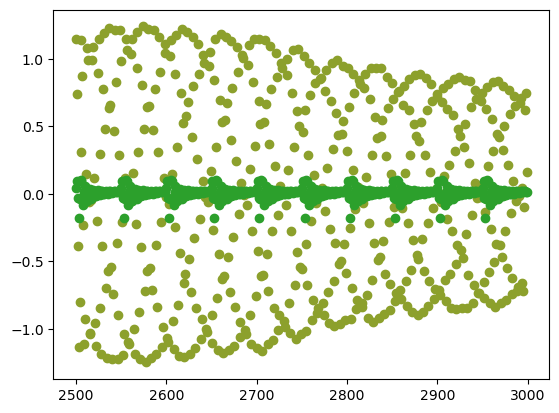

In [40]:
result = model1(x_test)

print('Input shape:', x_test.shape)
print('Output shape:', result.shape)

x_test = x_test.squeeze()

plt.scatter(x_test, y_test, label='Outputs', c='#8ca02c')
plt.scatter(x_test, result , label='Labels', c='#2ca02c')


plt.show()